# Train AMPL models to predict frontier molecular orbital energies

In [1]:
import importlib as imp
import sys
import os
import pdb
import numpy as np
import pandas as pd
import tempfile

import atomsci.ddm.pipeline.parameter_parser as parse
import atomsci.ddm.pipeline.model_pipeline as mp
import atomsci.ddm.pipeline.perf_plots as pp
import atomsci.ddm.pipeline.compare_models as cmp
import atomsci.ddm.pipeline.predict_from_model as pfm
import atomsci.ddm.utils.rdkit_easy as rdk

import logging
logging.basicConfig(format='%(asctime)-15s %(message)s')
logger = logging.getLogger('ATOM')
logger.setLevel(logging.DEBUG)

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

rdk.setup_notebook()

Loading BokehJS ...

In [2]:
parp_dir = "/usr/workspace/atom/PARP_compounds"
dset_dir = f"{parp_dir}/Datasets_and_Models"
fmo_dir = f"{dset_dir}/FMO_energies"
result_dir = tempfile.mkdtemp()

dset_file = f"{fmo_dir}/smiles_fmo_energies.csv"

In [4]:
dset_df = pd.read_csv(dset_file)
dset_df.head()

,compound_id,SMILES,HOMO_energy,LUMO_energy,HOMO_LUMO_gap
0,PC12090794,C#Cc1ccc(C#C)c2nsnc12,-6.062700,-2.745630,3.317070
1,a183,O=C1c2ccsc2-c2scc(-c3cnc4cnccc4c3)c21,-5.760653,-2.704813,3.055840
2,m32551,O=C(NNCS(=O)(=O)O)c1ccncc1,-6.974282,-1.039475,5.934807
3,s10080,CNc1c(-c2ccc3c(c2)-c2cc(SC)ccc2C3)ccc2c1Cc1ccc...,-5.164724,-0.897976,4.266748
4,PC2779698,CC(=O)c1ccc(Cl)nc1,-7.031426,-1.948336,5.083090


## Generate splits for FMO dataset

## Skip to here to use previously generated splits

In [5]:
split_uuid = {'scaffold': 'bb3d6cca-4c22-4a0a-b545-f0c63c7f8737',
 'fingerprint': 'd91cc113-8843-42ad-8f7d-7ec6db75a775',
 'random': 'ee169442-9faf-4cb5-8dad-292ff5fc2519'}

## Train a model with a scaffold split

INFO:ATOM:Created a dataset hash '9287104422f94f7066252bec38254351' from dataset_key '/usr/workspace/atom/PARP_compounds/Datasets_and_Models/FMO_energies/smiles_fmo_energies.csv'
DEBUG:ATOM:Attempting to load featurized dataset
DEBUG:ATOM:Exception when trying to load featurized data:
DynamicFeaturization doesn't support get_featurized_dset_name()
INFO:ATOM:Featurized dataset not previously saved for dataset smiles_fmo_energies, creating new
INFO:ATOM:Featurizing sample 0
INFO:ATOM:Featurizing sample 1000
INFO:ATOM:Featurizing sample 2000
INFO:ATOM:Featurizing sample 3000
INFO:ATOM:Featurizing sample 4000
INFO:ATOM:Featurizing sample 5000
INFO:ATOM:Featurizing sample 6000
INFO:ATOM:Featurizing sample 7000
INFO:ATOM:Featurizing sample 8000
INFO:ATOM:Featurizing sample 9000
INFO:ATOM:Featurizing sample 10000
INFO:ATOM:Featurizing sample 11000
INFO:ATOM:Featurizing sample 12000
INFO:ATOM:Featurizing sample 13000
INFO:ATOM:Featurizing sample 14000
INFO:ATOM:Featurizing sample 15000
INFO:AT

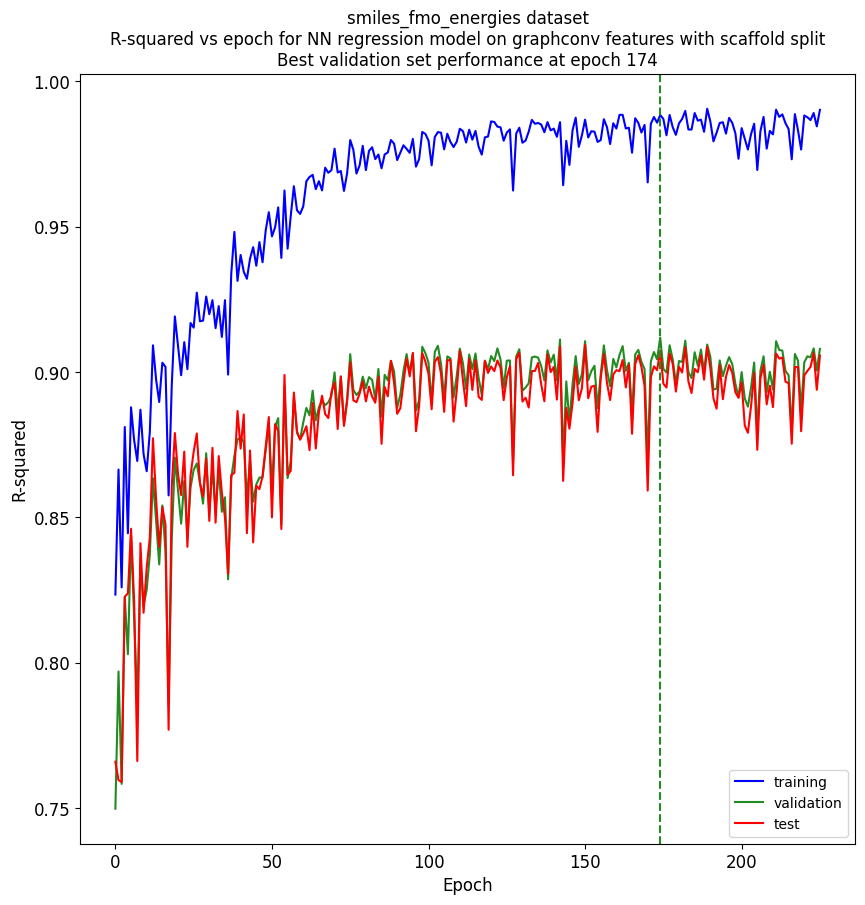

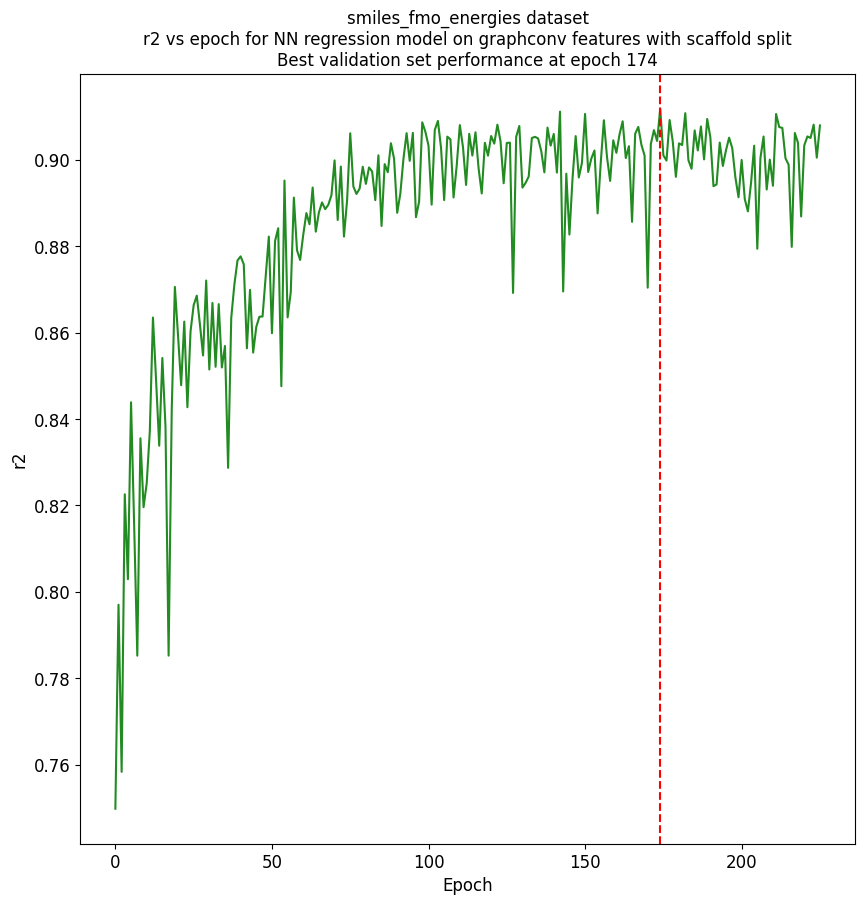

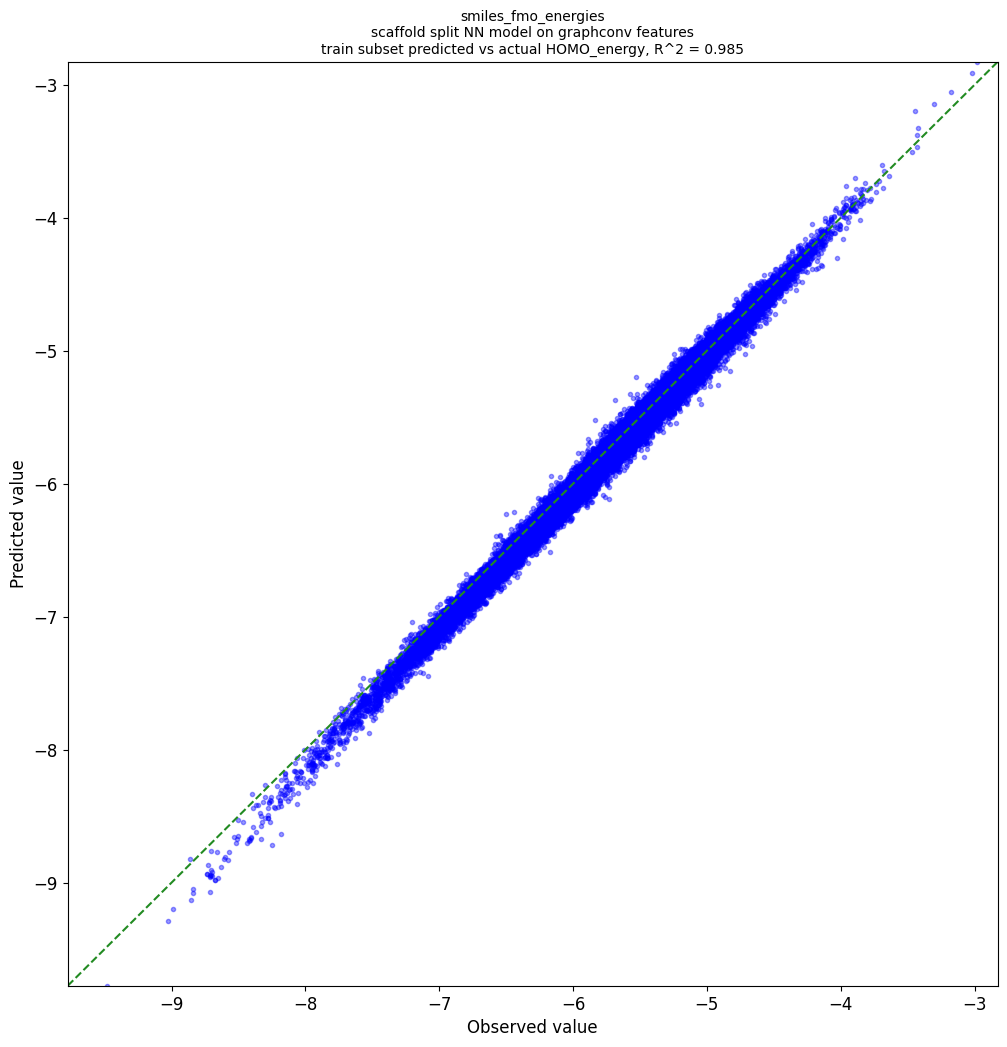

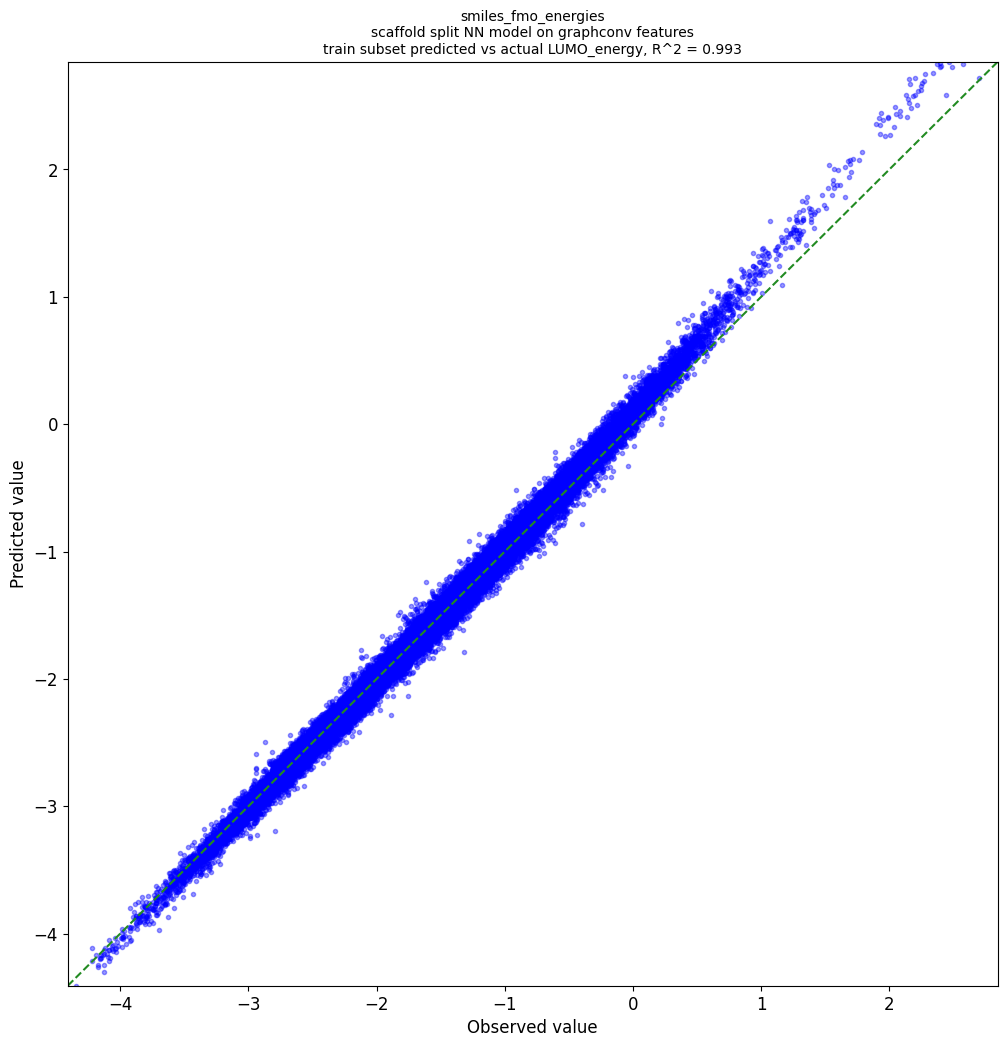

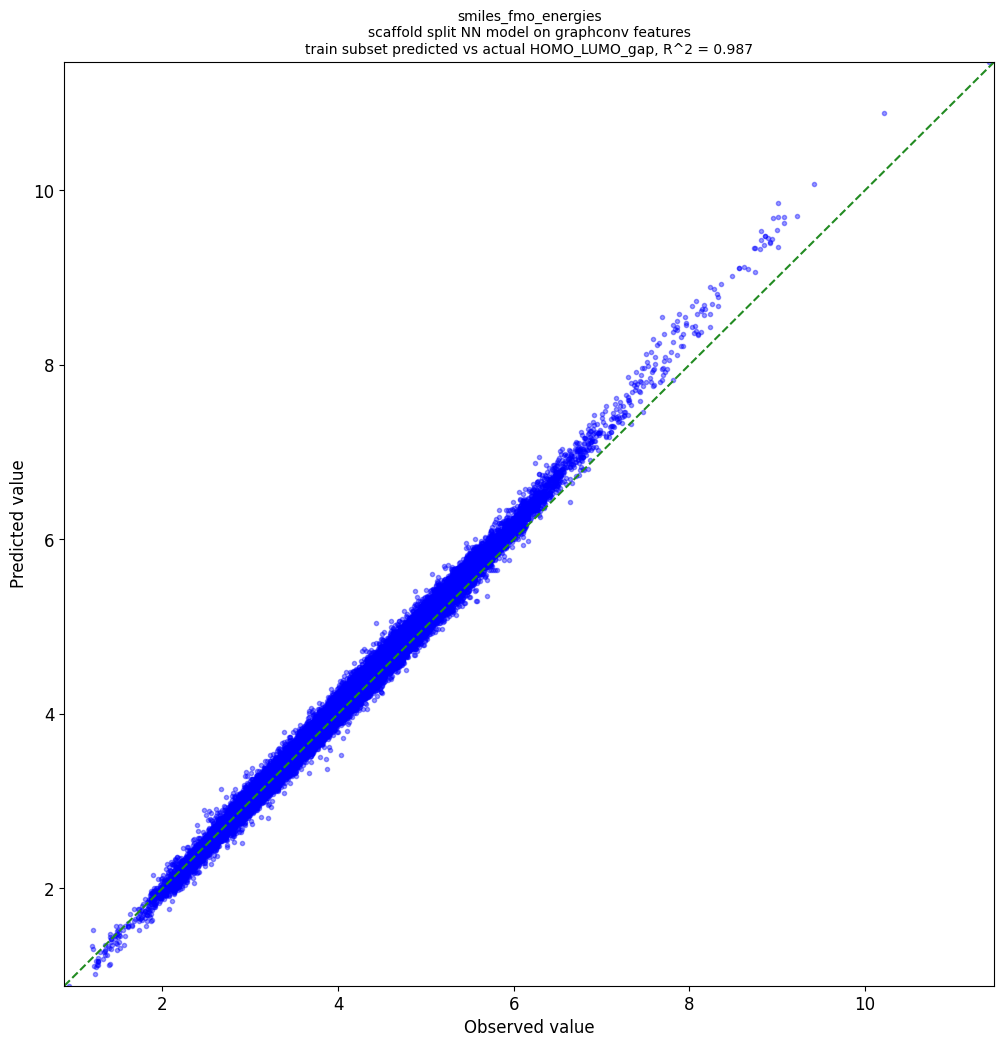

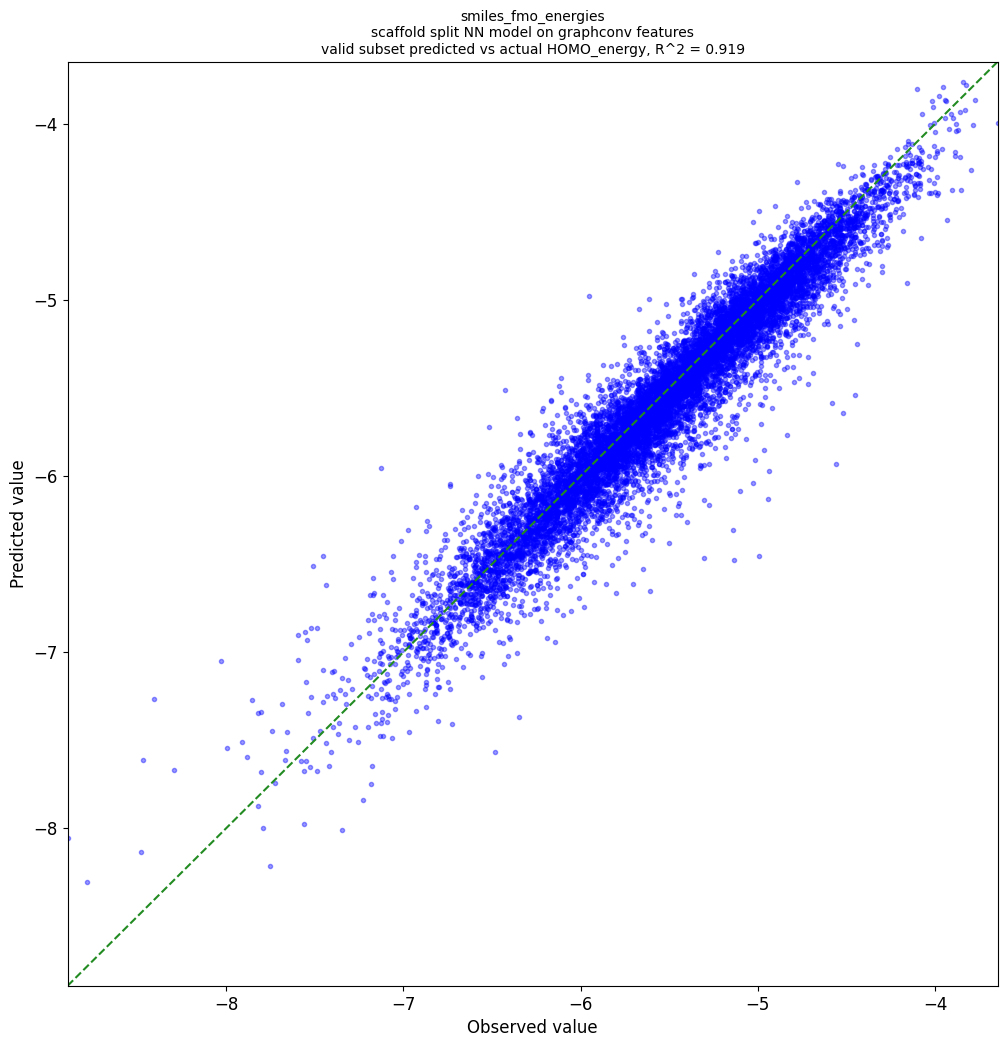

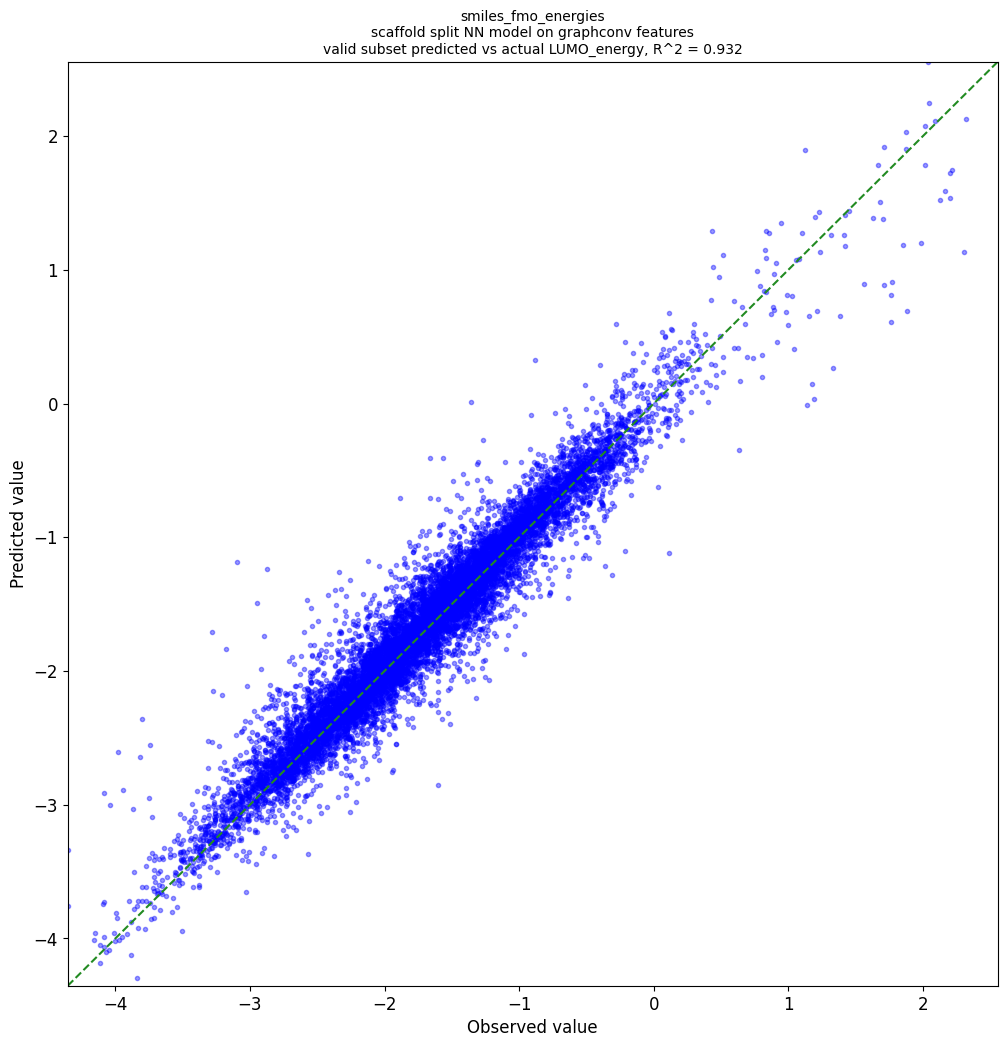

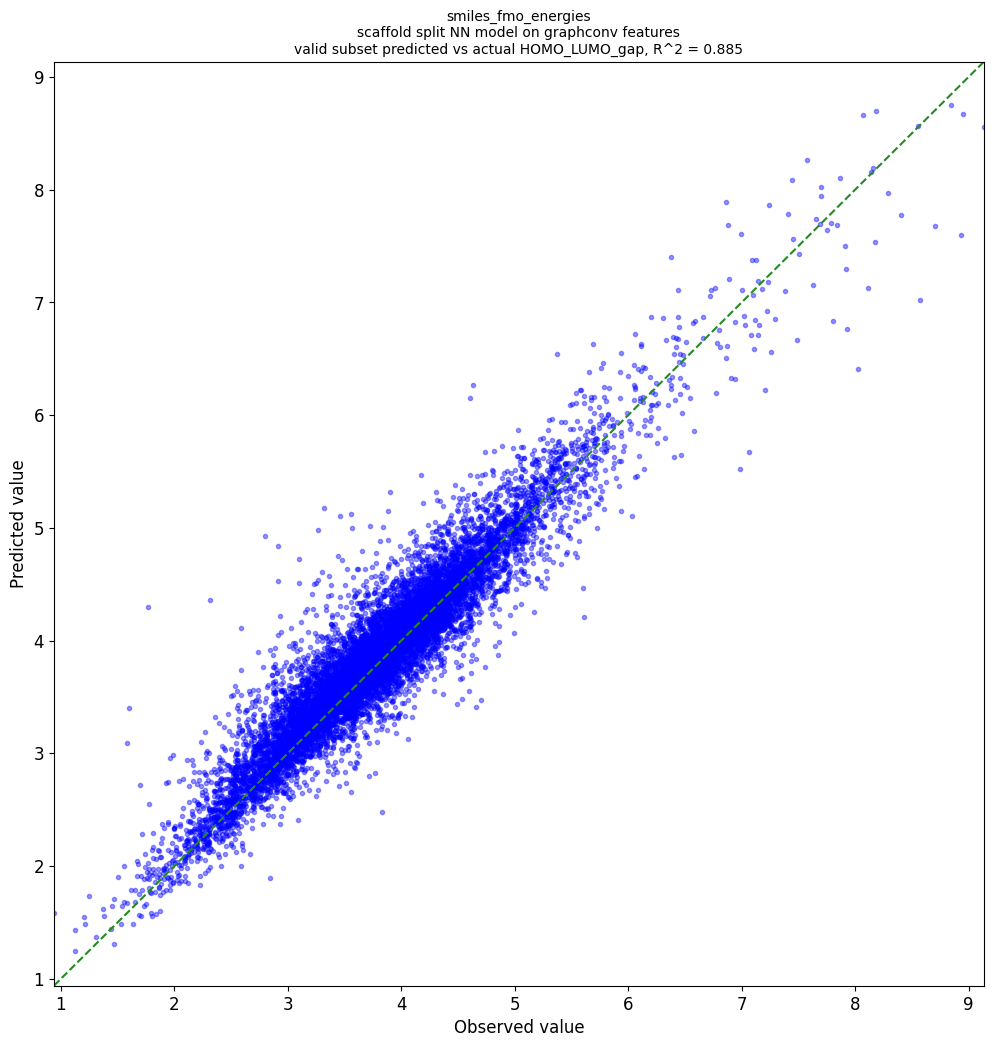

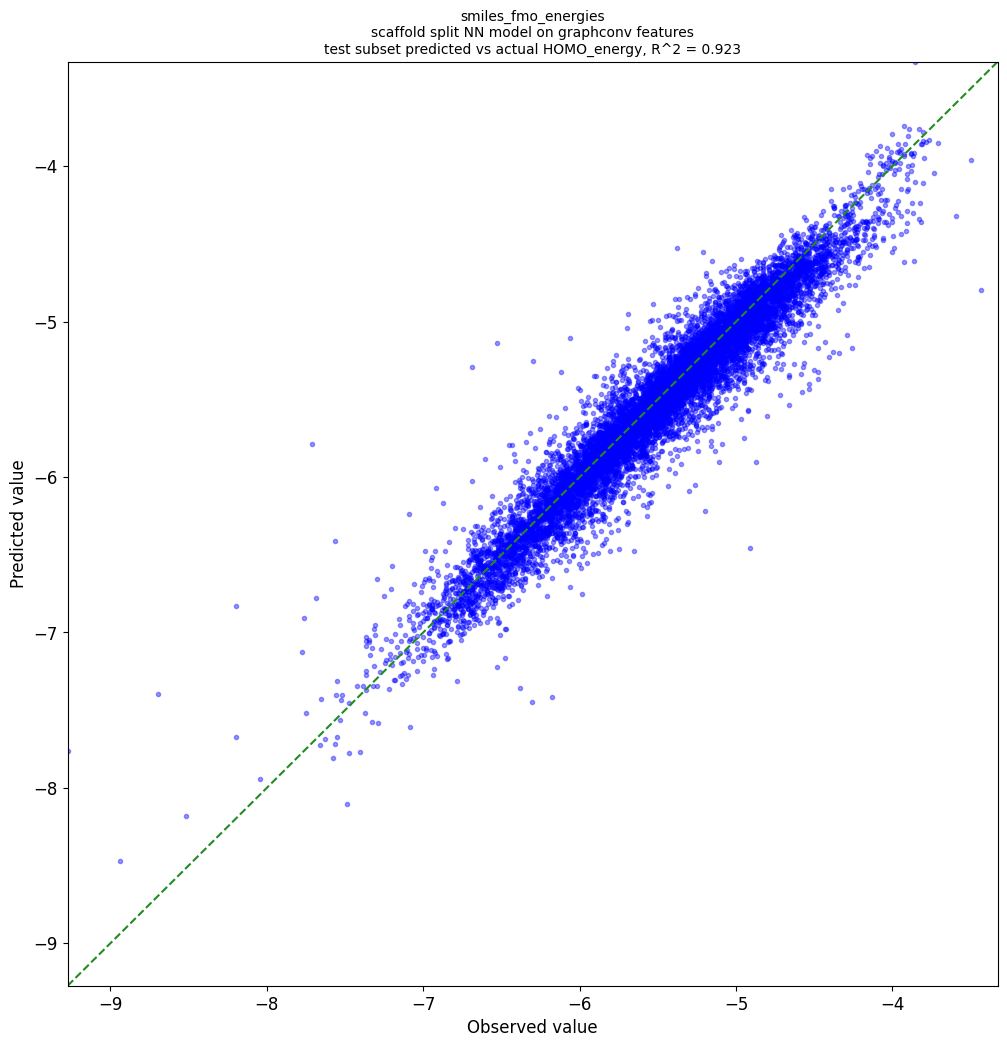

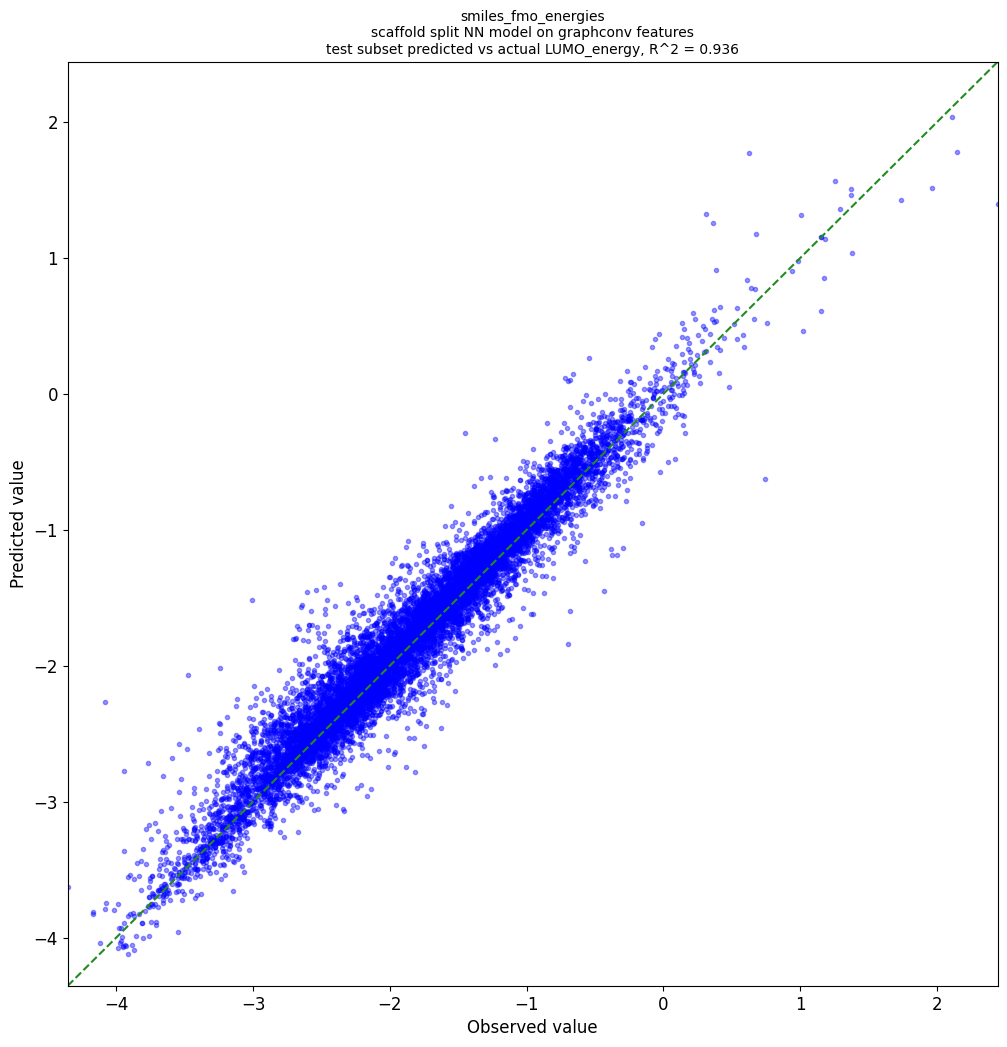

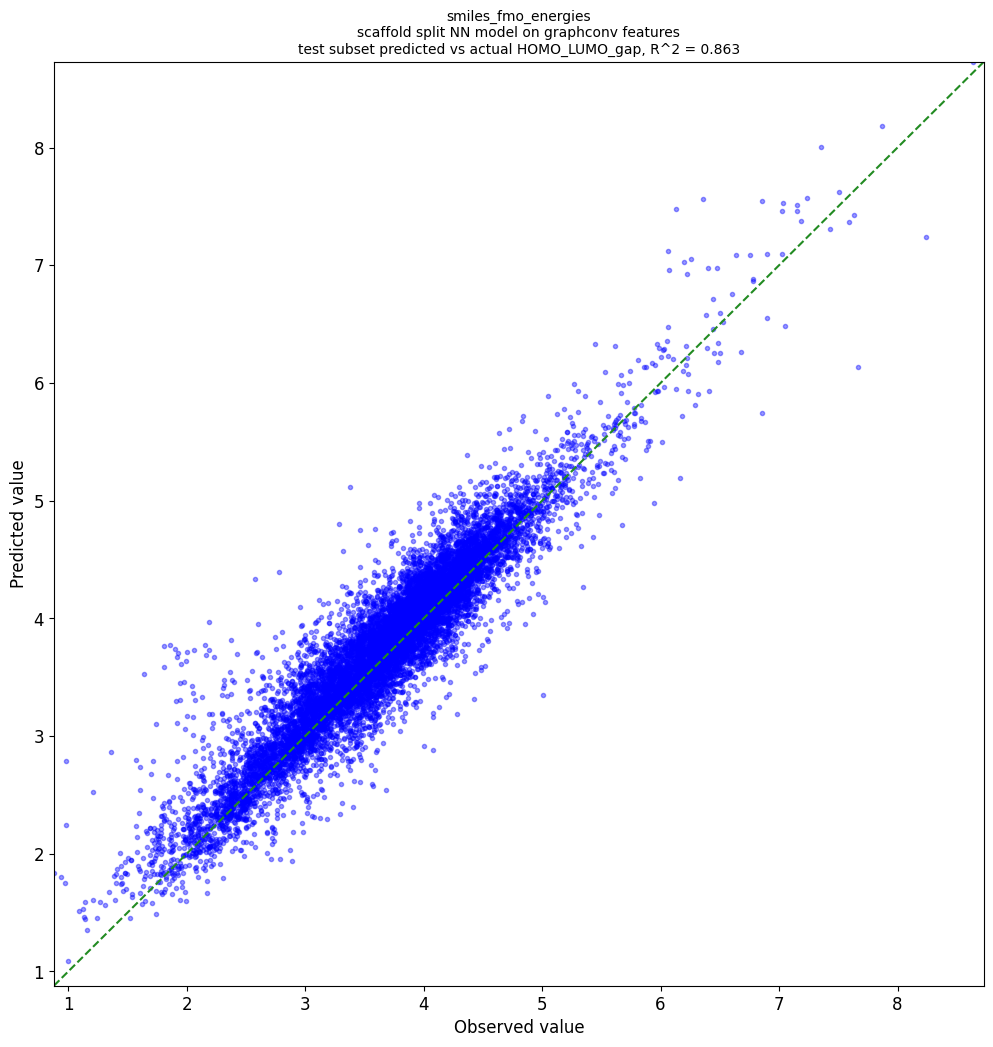

In [7]:
splitter = 'scaffold'
params = {
    "dataset_key" : dset_file,
    "datastore" : "False",
    "uncertainty": "False",
    "splitter": splitter,
    "split_valid_frac": "0.15",
    "split_test_frac": "0.15",
    "split_strategy": "train_valid_test",
    "previously_split": "True",
    "split_uuid": split_uuid[splitter],
    "prediction_type": "regression",
    "model_choice_score_type": "r2",
    "response_cols" : "HOMO_energy,LUMO_energy,HOMO_LUMO_gap",
    "id_col": "compound_id",
    "smiles_col" : "SMILES",
    "result_dir": result_dir,
    "system": "LC",
    "transformers": "True",
    "model_type": "NN",
    "featurizer": "graphconv",
    "learning_rate": ".0007",
    "layer_sizes": "256,256,256,256",
    "dropouts": "0.0,0.0,0.0,0.2",
    "save_results": "True",
    "collection_name": "fmo_energy_models",
    "max_epochs": "500",
    "early_stopping_patience": "50",
    "verbose": "False"
}
pparams = parse.wrapper(params)
MP = mp.ModelPipeline(pparams)
MP.train_model()
pp.plot_perf_vs_epoch(MP)
pp.plot_pred_vs_actual(MP)

## Train a model with a fingerprint split

INFO:ATOM:Created a dataset hash '9287104422f94f7066252bec38254351' from dataset_key '/usr/workspace/atom/PARP_compounds/Datasets_and_Models/FMO_energies/smiles_fmo_energies.csv'
DEBUG:ATOM:Attempting to load featurized dataset
DEBUG:ATOM:Exception when trying to load featurized data:
DynamicFeaturization doesn't support get_featurized_dset_name()
INFO:ATOM:Featurized dataset not previously saved for dataset smiles_fmo_energies, creating new
INFO:ATOM:Featurizing sample 0
INFO:ATOM:Featurizing sample 1000
INFO:ATOM:Featurizing sample 2000
INFO:ATOM:Featurizing sample 3000
INFO:ATOM:Featurizing sample 4000
INFO:ATOM:Featurizing sample 5000
INFO:ATOM:Featurizing sample 6000
INFO:ATOM:Featurizing sample 7000
INFO:ATOM:Featurizing sample 8000
INFO:ATOM:Featurizing sample 9000
INFO:ATOM:Featurizing sample 10000
INFO:ATOM:Featurizing sample 11000
INFO:ATOM:Featurizing sample 12000
INFO:ATOM:Featurizing sample 13000
INFO:ATOM:Featurizing sample 14000
INFO:ATOM:Featurizing sample 15000
INFO:AT

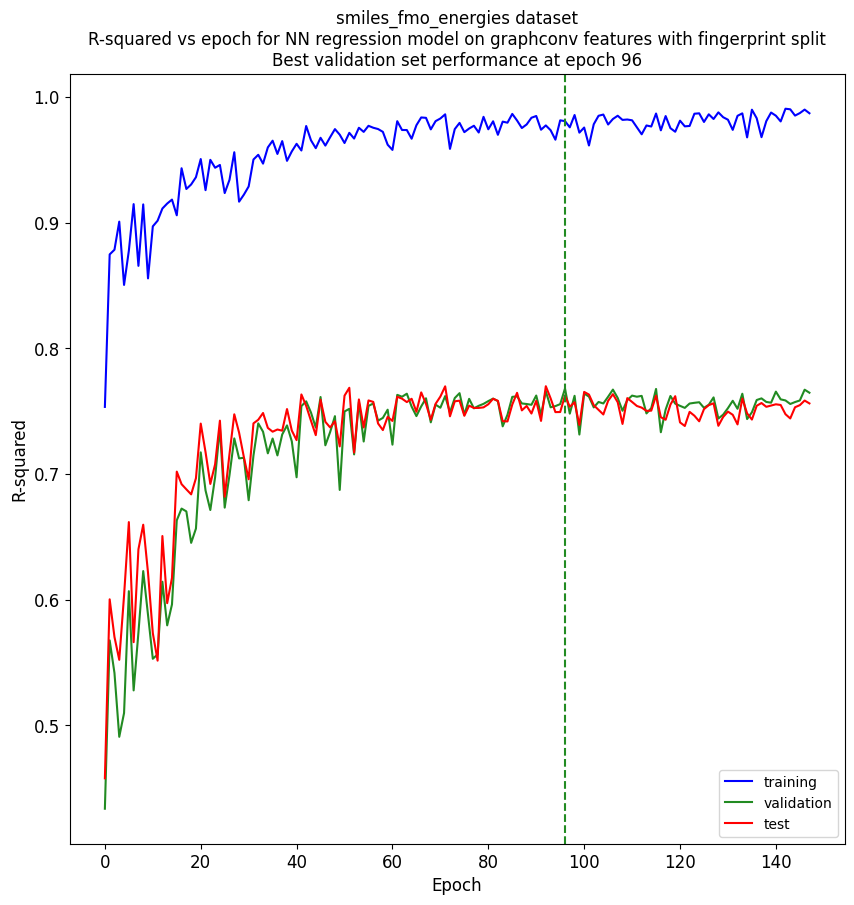

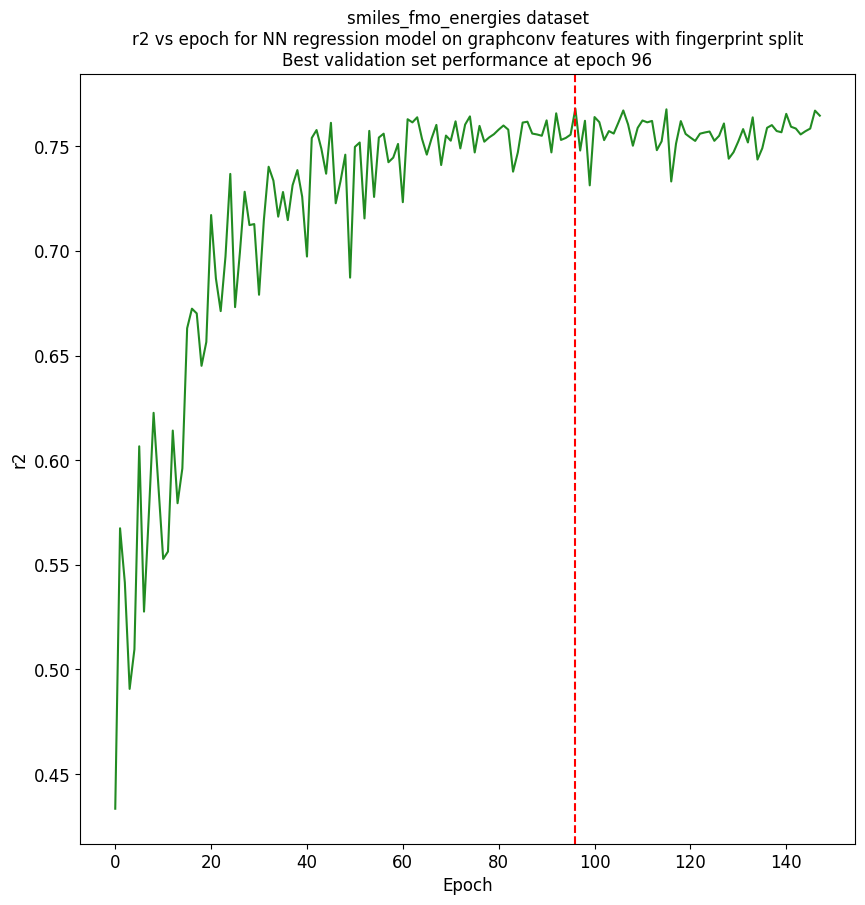

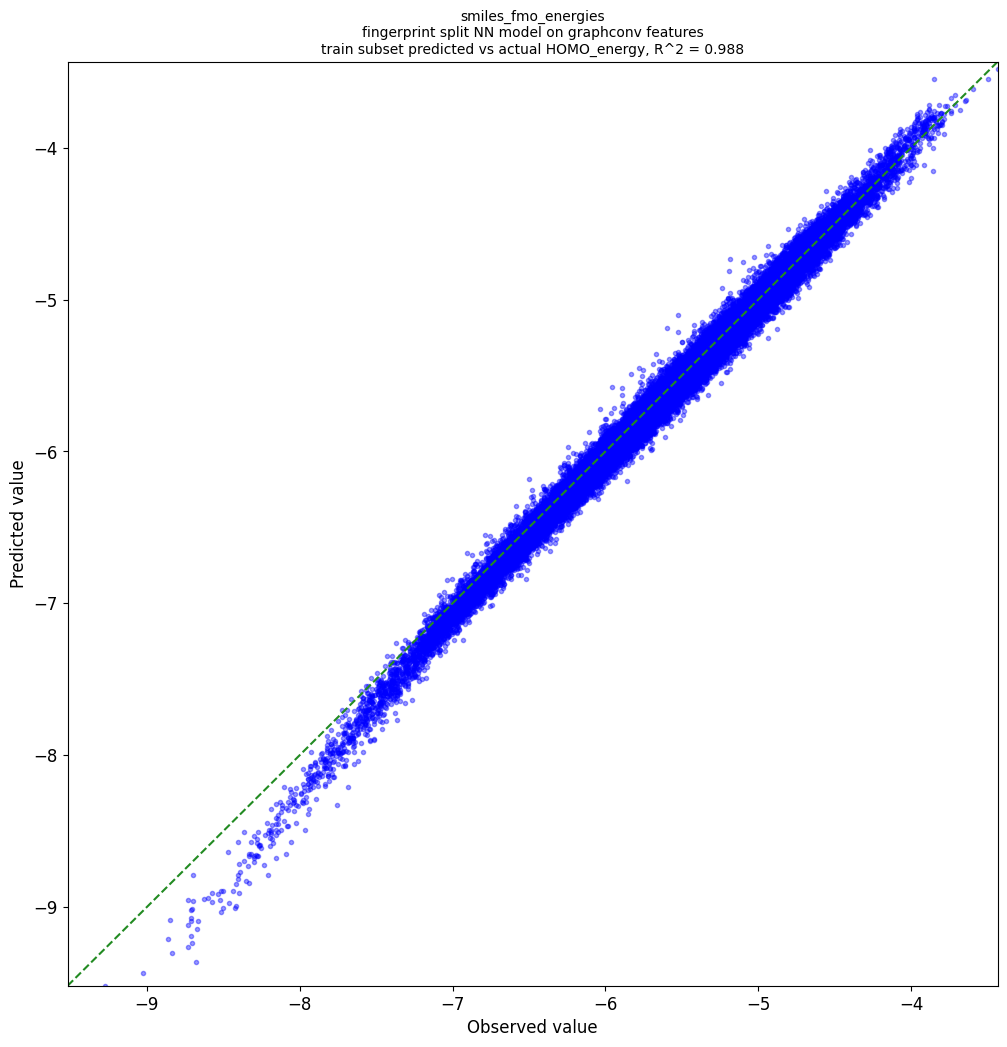

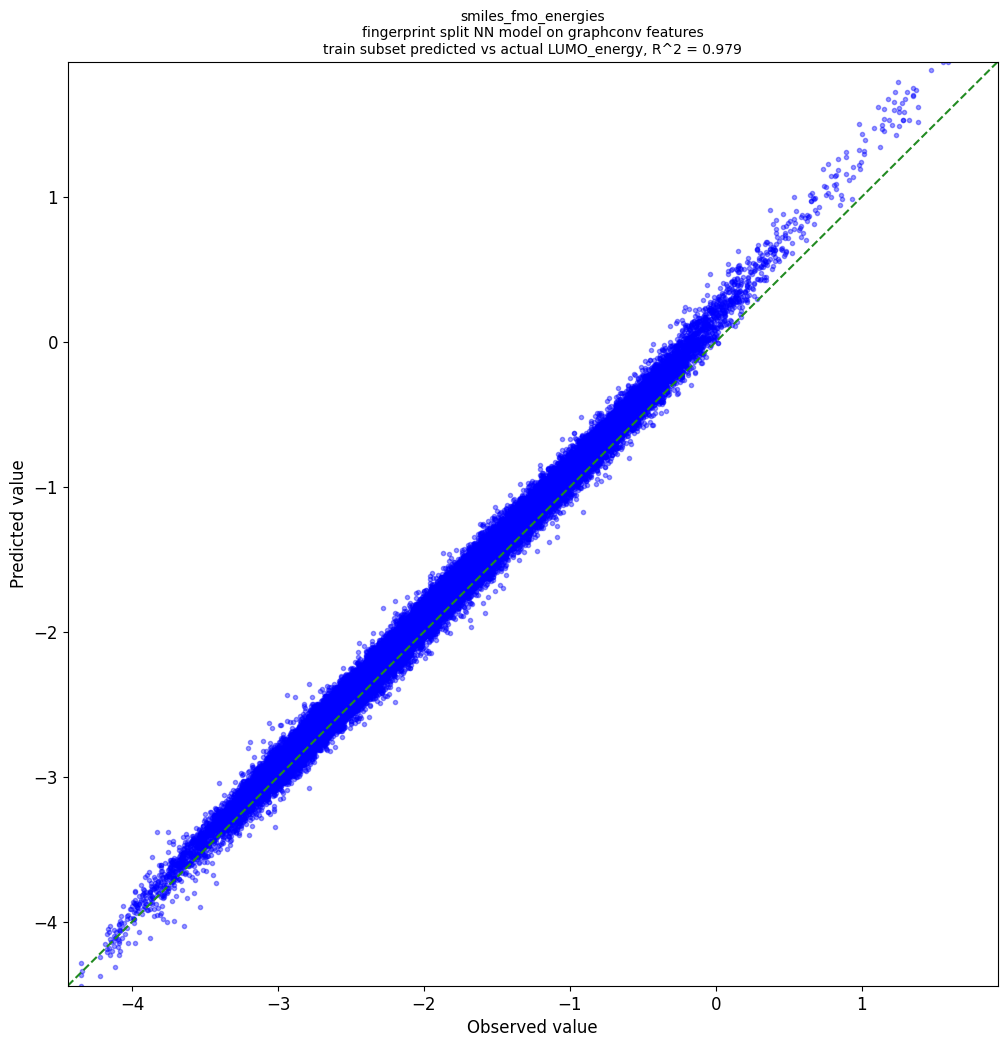

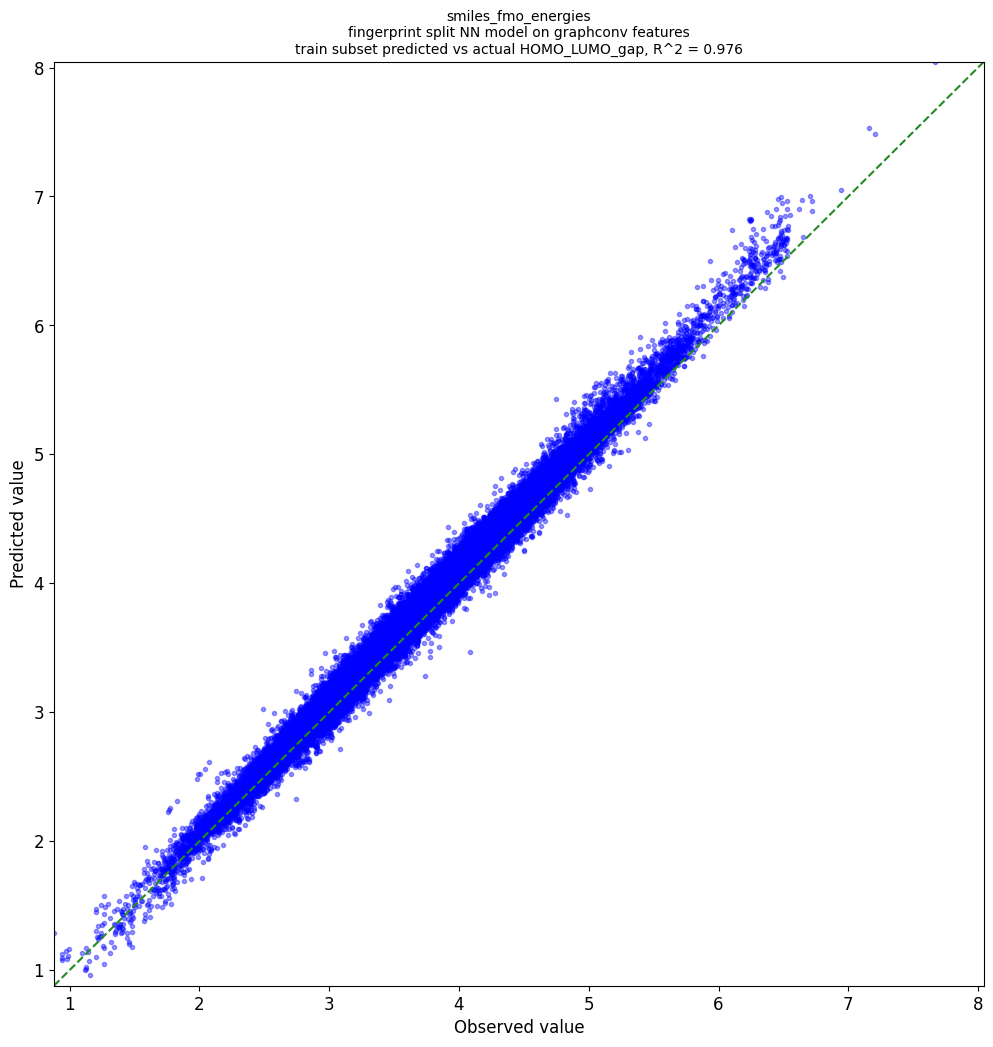

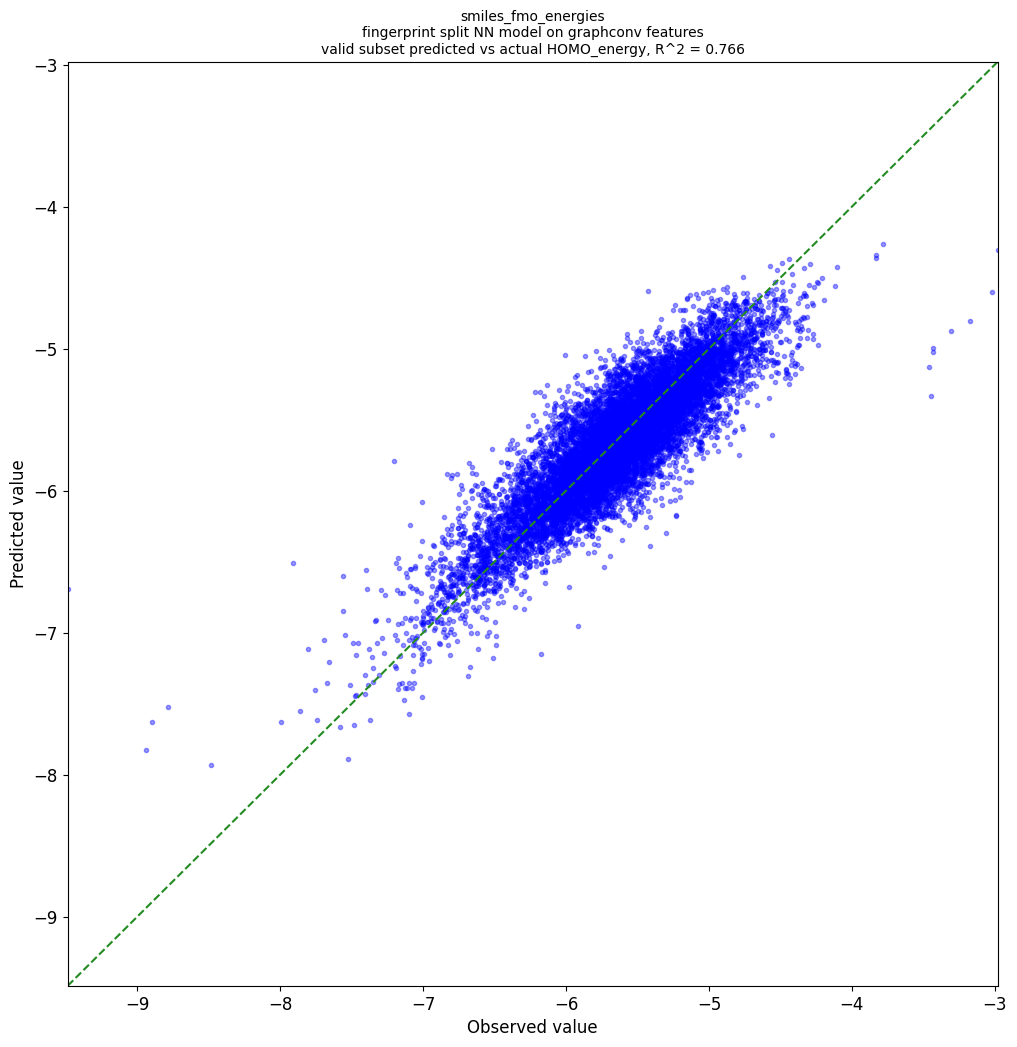

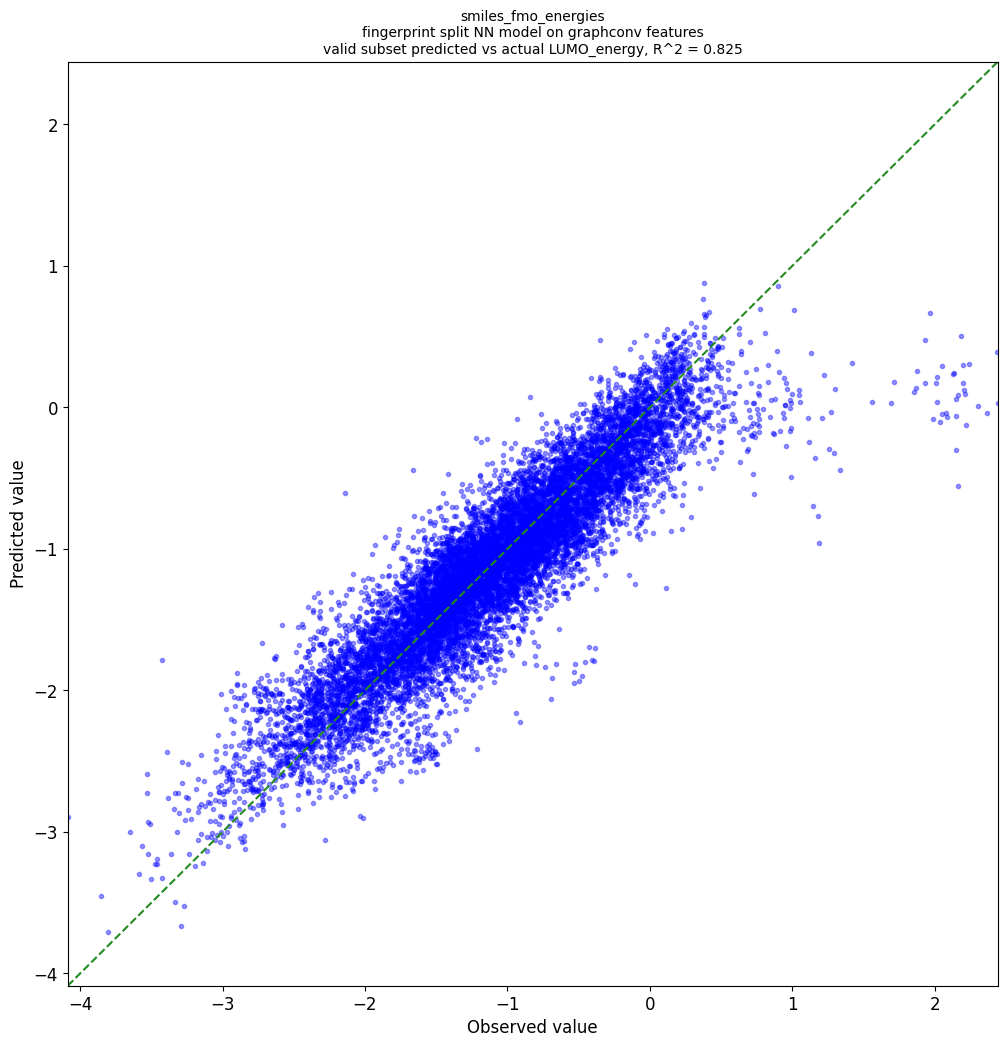

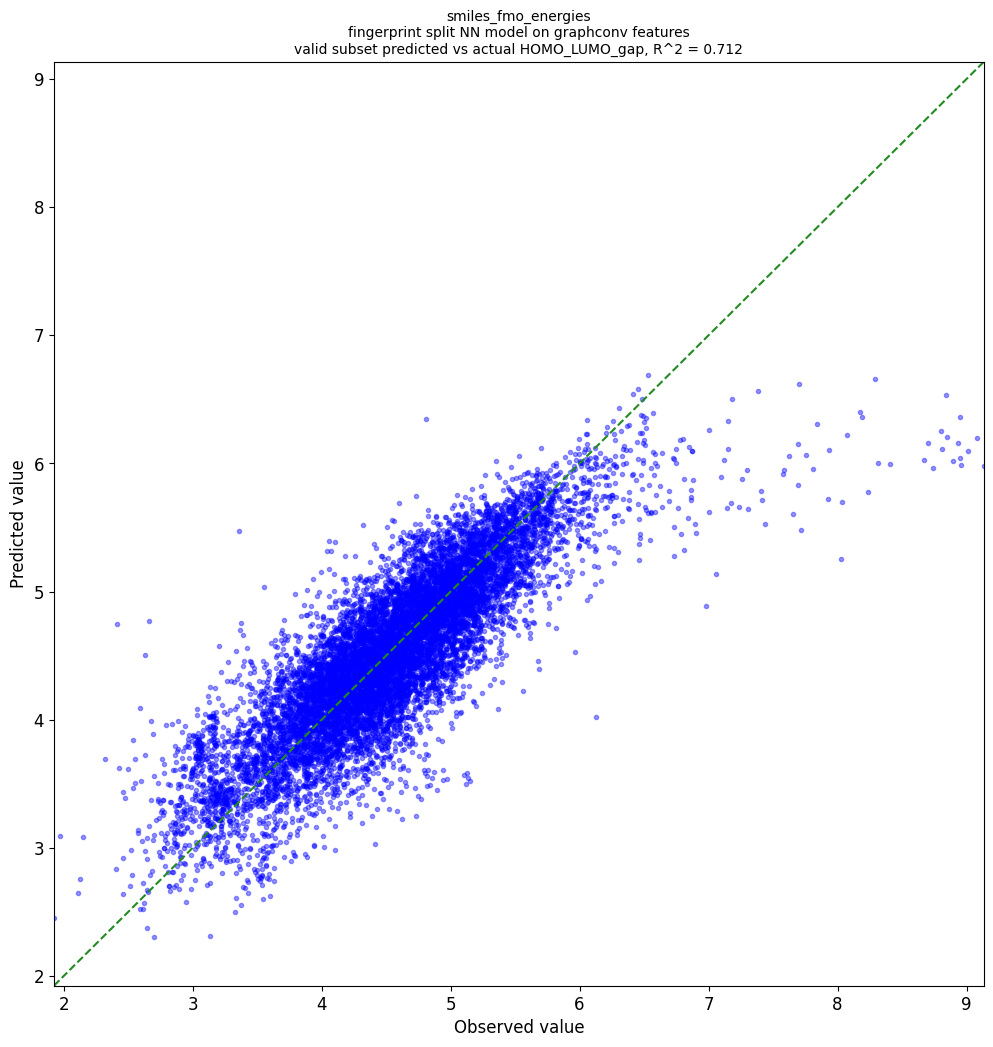

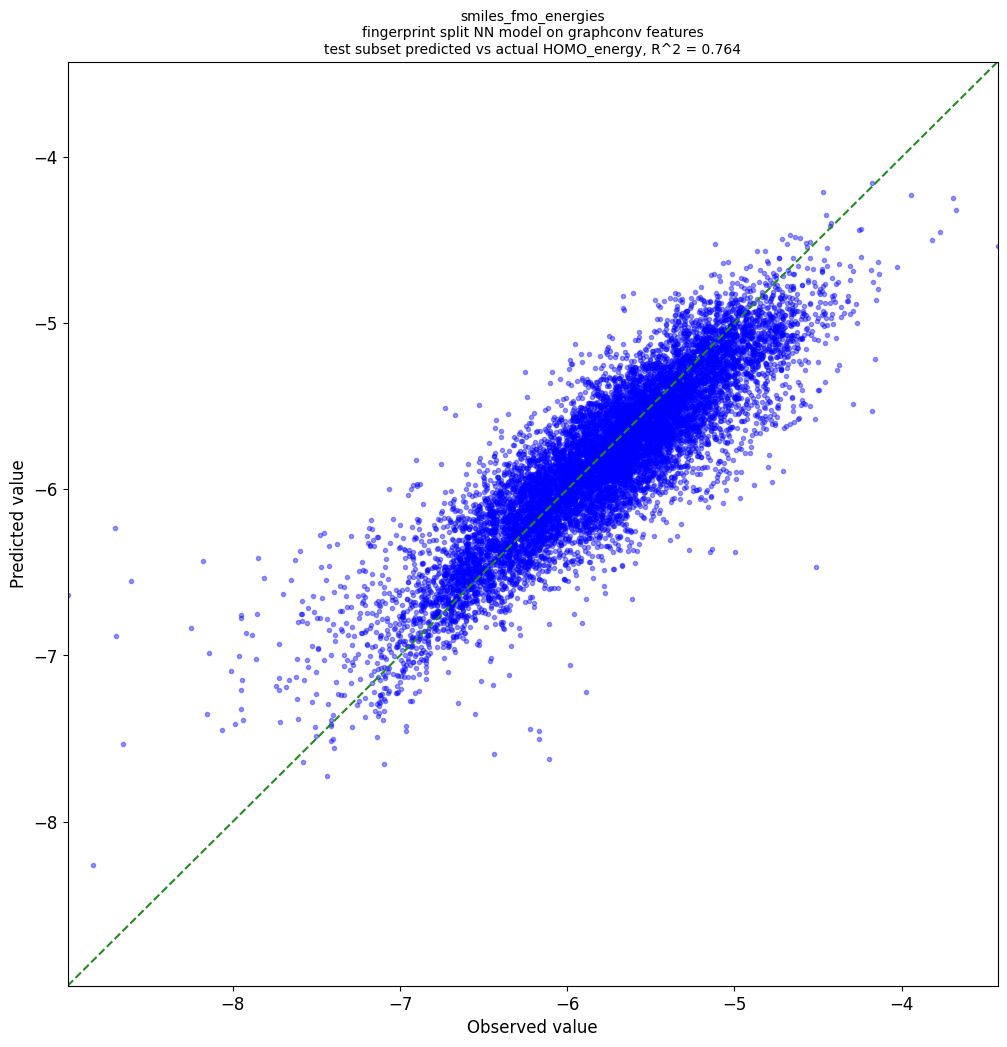

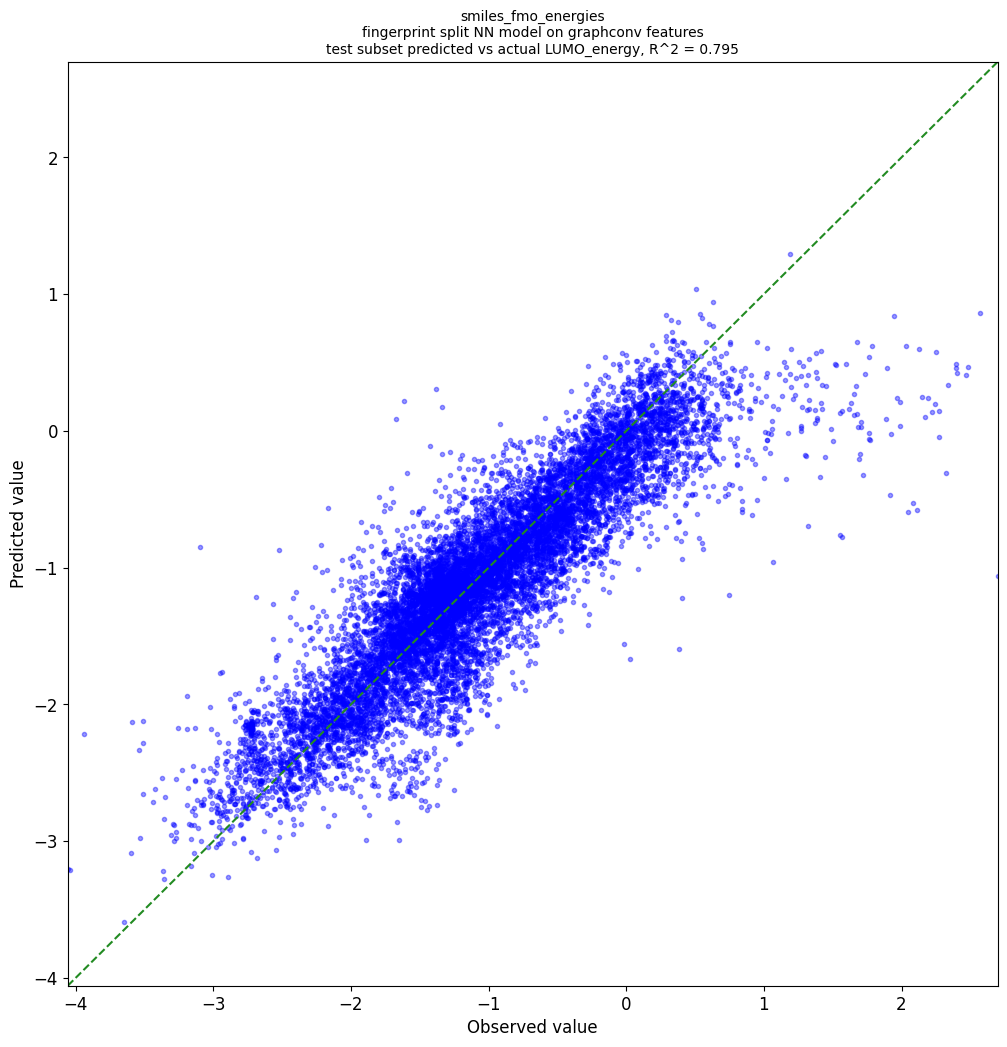

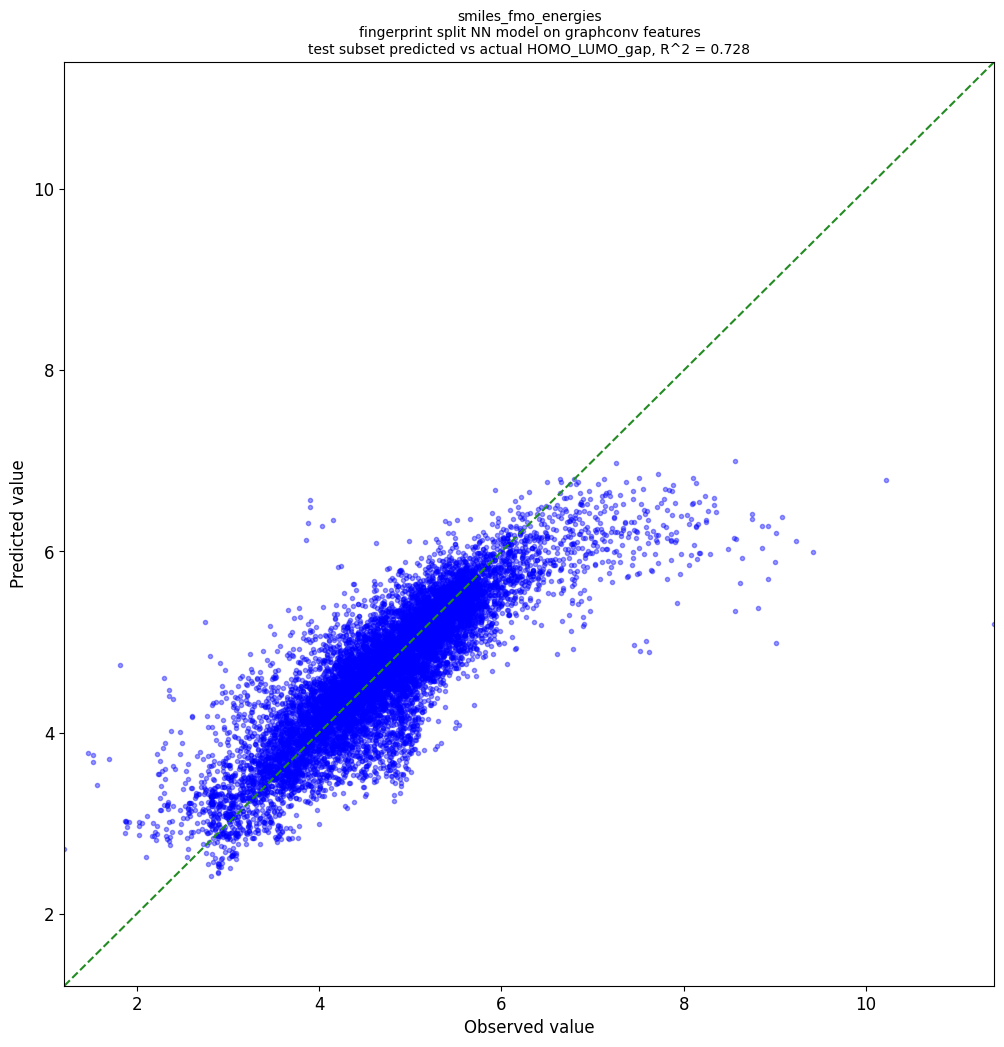

In [8]:
splitter = 'fingerprint'
params = {
    "dataset_key" : dset_file,
    "datastore" : "False",
    "uncertainty": "False",
    "splitter": splitter,
    "split_valid_frac": "0.15",
    "split_test_frac": "0.15",
    "split_strategy": "train_valid_test",
    "previously_split": "True",
    "split_uuid": split_uuid[splitter],
    "prediction_type": "regression",
    "model_choice_score_type": "r2",
    "response_cols" : "HOMO_energy,LUMO_energy,HOMO_LUMO_gap",
    "id_col": "compound_id",
    "smiles_col" : "SMILES",
    "result_dir": result_dir,
    "system": "LC",
    "transformers": "True",
    "model_type": "NN",
    "featurizer": "graphconv",
    "learning_rate": ".0007",
    "layer_sizes": "256,256,256,256",
    "dropouts": "0.0,0.0,0.0,0.2",
    "save_results": "True",
    "collection_name": "fmo_energy_models",
    "max_epochs": "500",
    "early_stopping_patience": "50",
    "verbose": "False"
}
pparams = parse.wrapper(params)
MP = mp.ModelPipeline(pparams)
MP.train_model()
pp.plot_perf_vs_epoch(MP)
pp.plot_pred_vs_actual(MP)